# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
# Environment preparation
import sys
!pip install expectexception

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Preparing environment
import expectexception

# %%expect_exception TypeError

In [3]:
!ls sample_data/

anscombe.json		      Marketing_data.csv     README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from pandas.core.dtypes.api import is_numeric_dtype

# Set format for float values
pd.options.display.float_format = '{:,.4f}'.format

In [5]:
# # You will need to mount your drive using the following commands:
# # For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# You have to include the full link to the csv file containing your dataset

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

creditcard_df = pd.read_csv('sample_data/Marketing_data.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.9007,0.8182,95.4000,0.0000,95.4000,0.0000,0.1667,0.0000,0.0833,0.0000,0,2,"1,000.0000",201.8021,139.5098,0.0000,12
1,C10002,"3,202.4674",0.9091,0.0000,0.0000,0.0000,"6,442.9455",0.0000,0.0000,0.0000,0.2500,4,0,"7,000.0000","4,103.0326","1,072.3402",0.2222,12
2,C10003,"2,495.1489",1.0000,773.1700,773.1700,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0,12,"7,500.0000",622.0667,627.2848,0.0000,12
3,C10004,"1,666.6705",0.6364,"1,499.0000","1,499.0000",0.0000,205.7880,0.0833,0.0833,0.0000,0.0833,1,1,"7,500.0000",0.0000,NaN,0.0000,12
4,C10005,817.7143,1.0000,16.0000,16.0000,0.0000,0.0000,0.0833,0.0833,0.0000,0.0000,0,1,"1,200.0000",678.3348,244.7912,0.0000,12


In [7]:
# 18 features with 8950 points  
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,"8,950.0000","8,950.0000","8,950.0000","8,950.0000","8,950.0000","8,950.0000","8,950.0000","8,950.0000","8,950.0000","8,950.0000","8,950.0000","8,950.0000","8,949.0000","8,950.0000","8,637.0000","8,950.0000","8,950.0000"
mean,"1,564.4748",0.8773,"1,003.2048",592.4374,411.0676,978.8711,0.4904,0.2025,0.3644,0.1351,3.2488,14.7098,"4,494.4495","1,733.1439",864.2065,0.1537,11.5173
std,"2,081.5319",0.2369,"2,136.6348","1,659.8879",904.3381,"2,097.1639",0.4014,0.2983,0.3974,0.2001,6.8246,24.8576,"3,638.8157","2,895.0638","2,372.4466",0.2925,1.3383
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,50.0000,0.0000,0.0192,0.0000,6.0000
25%,128.2819,0.8889,39.6350,0.0000,0.0000,0.0000,0.0833,0.0000,0.0000,0.0000,0.0000,1.0000,"1,600.0000",383.2762,169.1237,0.0000,12.0000
50%,873.3852,1.0000,361.2800,38.0000,89.0000,0.0000,0.5000,0.0833,0.1667,0.0000,0.0000,7.0000,"3,000.0000",856.9015,312.3439,0.0000,12.0000
75%,"2,054.1400",1.0000,"1,110.1300",577.4050,468.6375,"1,113.8211",0.9167,0.3000,0.7500,0.2222,4.0000,17.0000,"6,500.0000","1,901.1343",825.4855,0.1429,12.0000
max,"19,043.1386",1.0000,"49,039.5700","40,761.2500","22,500.0000","47,137.2118",1.0000,1.0000,1.0000,1.5000,123.0000,358.0000,"30,000.0000","50,721.4834","76,406.2075",1.0000,12.0000


In [9]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,"11,547.5200",1.0000,"49,039.5700","40,761.2500","8,278.3200",558.1669,1.0000,1.0000,0.9167,0.0833,1,101,"22,500.0000","46,930.5982","2,974.0694",0.2500,12


In [10]:
# Let's discover what was the maximum cash advance
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [11]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,"10,905.0538",1.0000,431.9300,133.5000,298.4300,"47,137.2118",0.5833,0.2500,0.5000,1.0000,123,21,"19,600.0000","39,048.5976","5,394.1737",0.0000,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

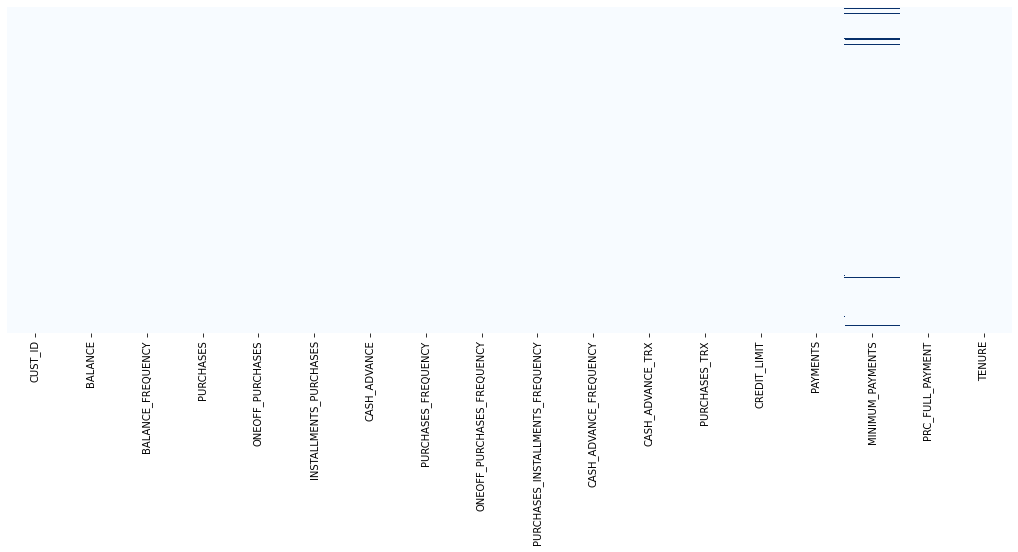

In [12]:
%matplotlib inline

# Let's see if we have any missing data, luckily we don't!
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues", ax=ax);

In [13]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.MINIMUM_PAYMENTS.fillna(creditcard_df.MINIMUM_PAYMENTS.mean(), inplace=True)

In [15]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.CREDIT_LIMIT.fillna(creditcard_df.CREDIT_LIMIT.mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

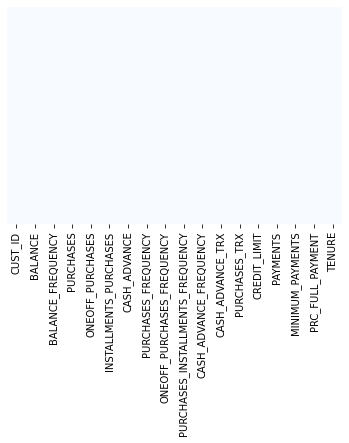

In [16]:
%matplotlib inline
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");

creditcard_df.info()

In [17]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [18]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop(labels='CUST_ID', axis=1, inplace=True)

In [19]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.9007,0.8182,95.4000,0.0000,95.4000,0.0000,0.1667,0.0000,0.0833,0.0000,0,2,"1,000.0000",201.8021,139.5098,0.0000,12
1,"3,202.4674",0.9091,0.0000,0.0000,0.0000,"6,442.9455",0.0000,0.0000,0.0000,0.2500,4,0,"7,000.0000","4,103.0326","1,072.3402",0.2222,12
2,"2,495.1489",1.0000,773.1700,773.1700,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0,12,"7,500.0000",622.0667,627.2848,0.0000,12
3,"1,666.6705",0.6364,"1,499.0000","1,499.0000",0.0000,205.7880,0.0833,0.0833,0.0000,0.0833,1,1,"7,500.0000",0.0000,864.2065,0.0000,12
4,817.7143,1.0000,16.0000,16.0000,0.0000,0.0000,0.0833,0.0833,0.0000,0.0000,0,1,"1,200.0000",678.3348,244.7912,0.0000,12


In [20]:
# Total columns
len(creditcard_df.columns)

17

In [21]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

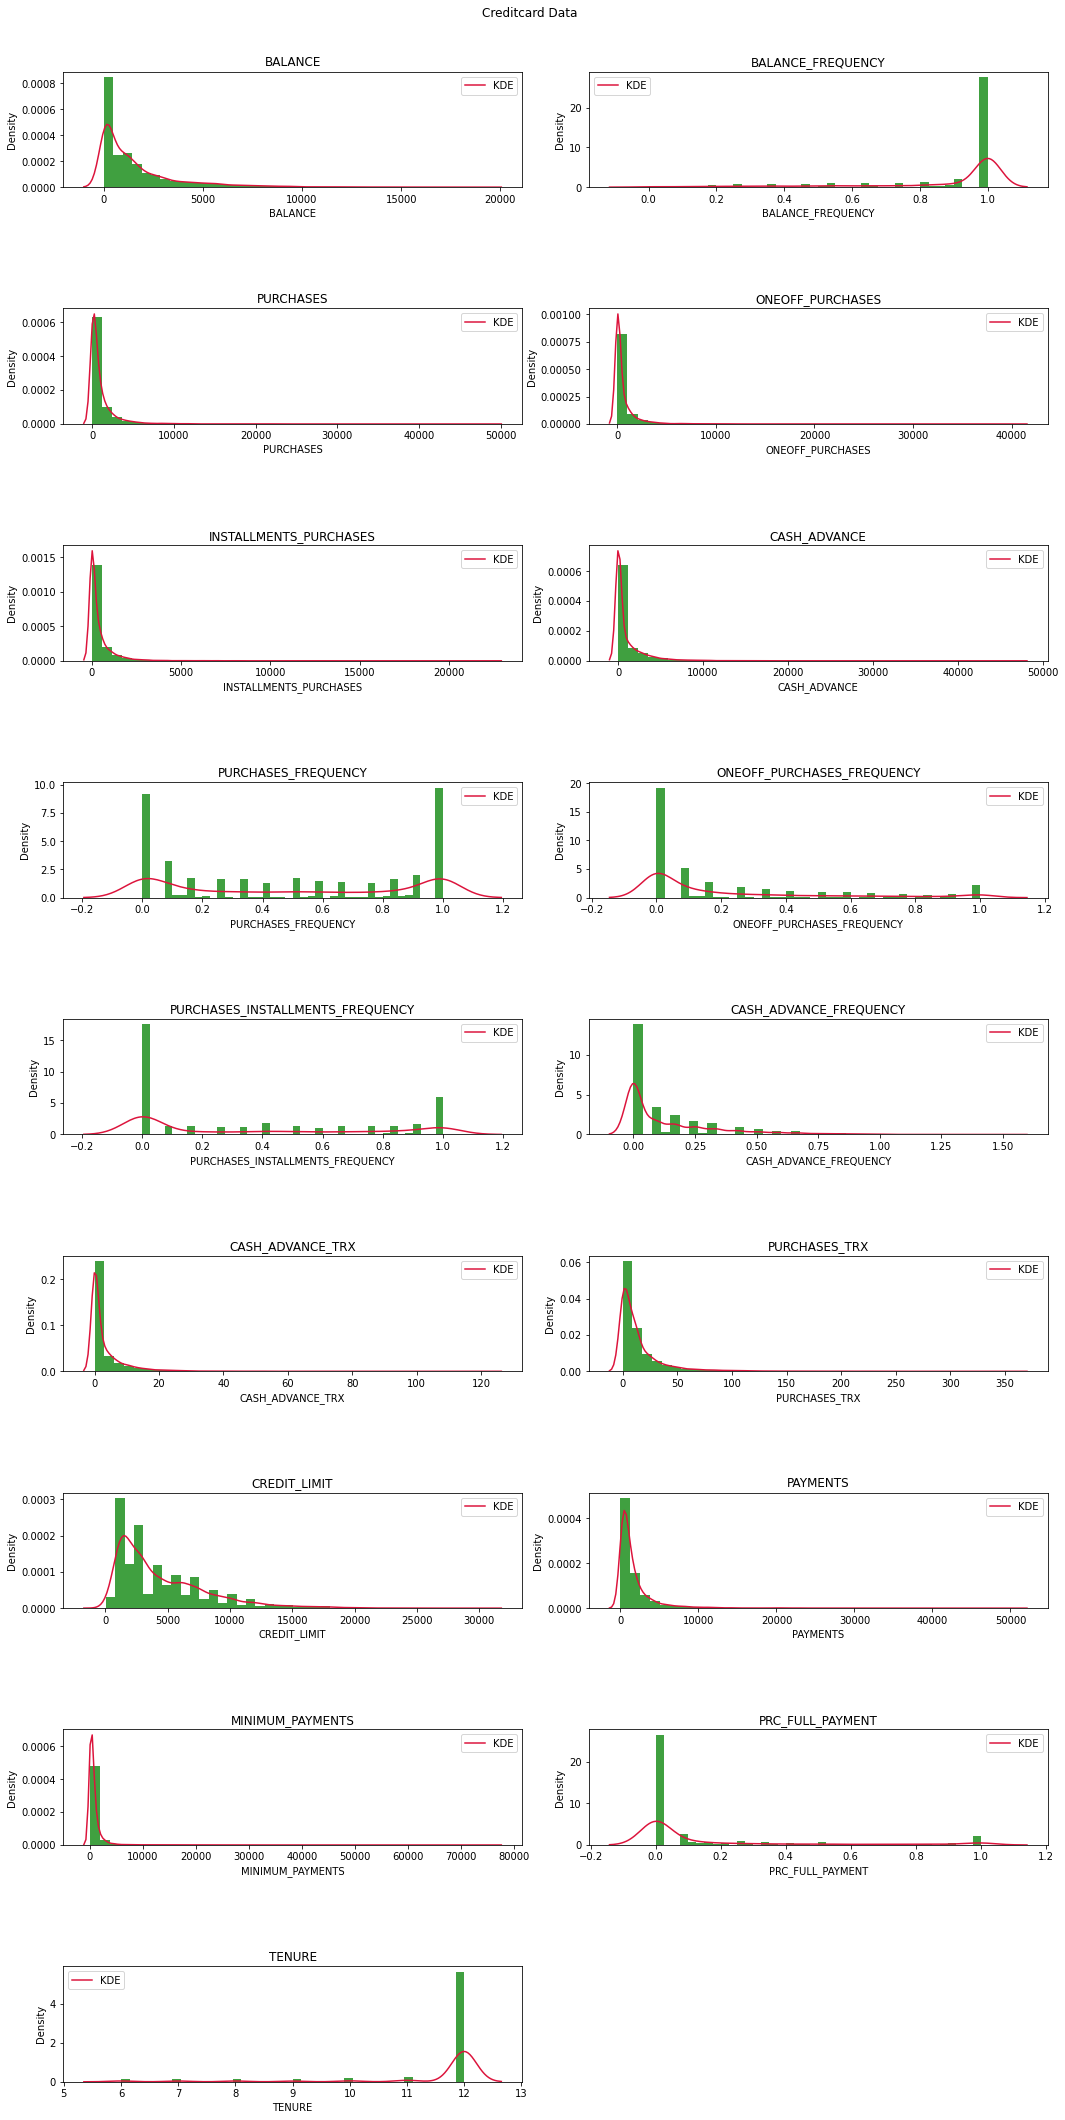

In [22]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure
import enum
%matplotlib inline

nrows, ncols = 9, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,30))
for i, col in enumerate(creditcard_df.columns):
  ax = axes.ravel()[i]
  ax = sns.histplot(data=creditcard_df, x=col, 
                    color='g', bins=40, linewidth=0, stat='density',
                    # kde=True, line_kws={"color":"crimson", "lw":1.5, "label":"KDE"}, 
                    ax=ax) 
  # ax.lines[0].set_color('crimson')
  sns.kdeplot(data=creditcard_df, x=col, color='crimson', shade=False, label='KDE', ax=ax)
  ax.set_title(col)
  ax.legend()

axes.ravel()[-1].axis('off') 
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=.95, wspace=None, hspace=1.05)
fig.suptitle('Creditcard Data');

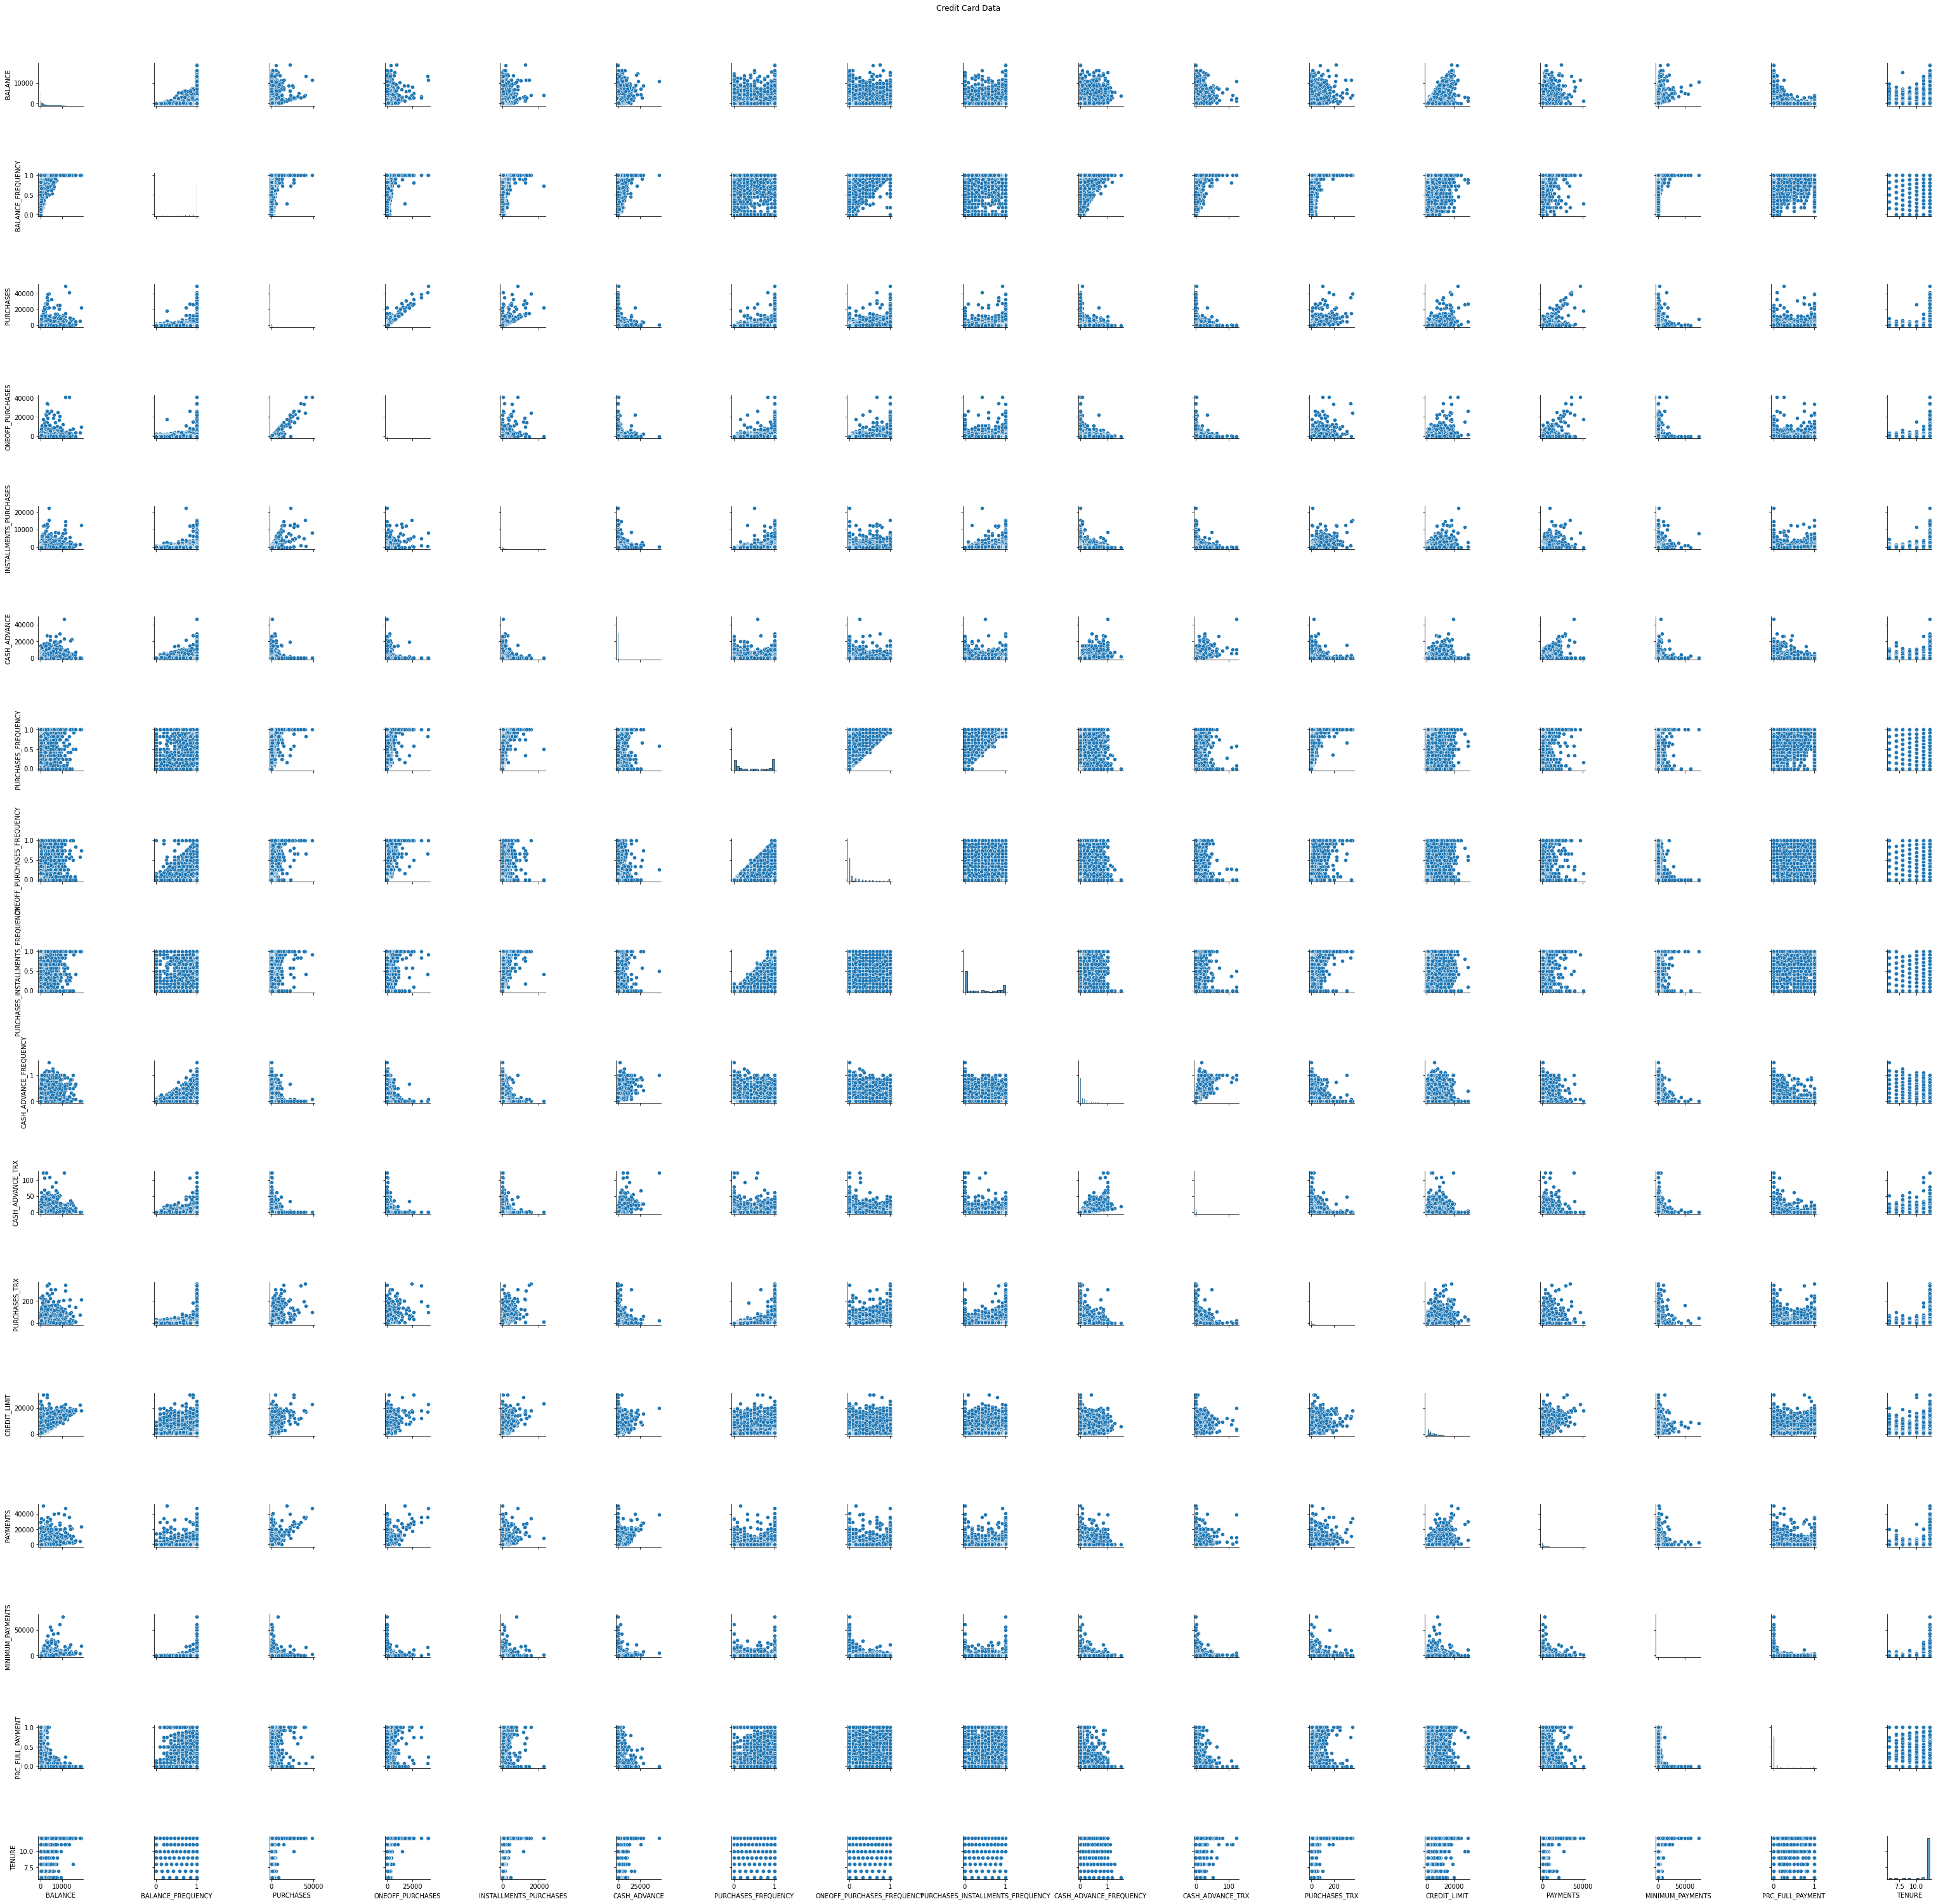

In [23]:
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
sns.pairplot(creditcard_df)
plt.suptitle('Credit Card Data');
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=.95, wspace=None, hspace=None);

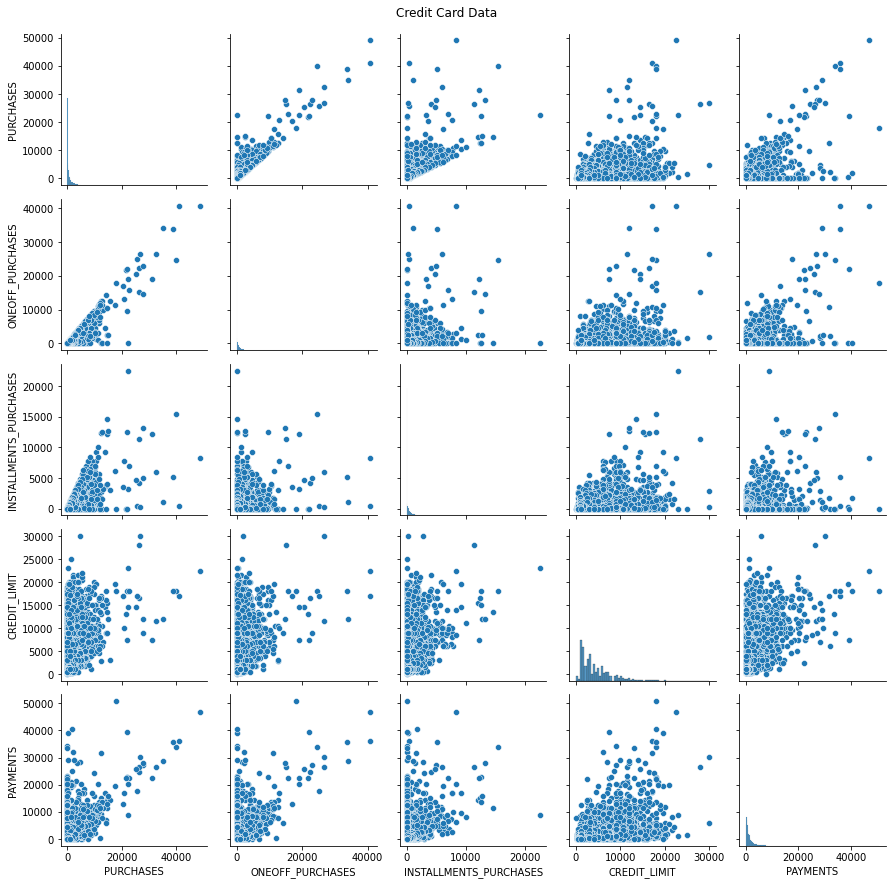

In [24]:
sns.pairplot(creditcard_df, vars=['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS'])
plt.suptitle('Credit Card Data');
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=.95, wspace=None, hspace=None);

In [25]:
creditcard_df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.0000,0.3224,0.1813,0.1643,0.1265,0.4967,-0.0779,0.0732,-0.0632,0.4492,0.3852,0.1543,0.5313,0.3228,0.3943,-0.3190,0.0727
BALANCE_FREQUENCY,0.3224,1.0000,0.1337,0.1043,0.1243,0.0994,0.2297,0.2024,0.1761,0.1919,0.1416,0.1896,0.0958,0.0650,0.1142,-0.0951,0.1198
PURCHASES,0.1813,0.1337,1.0000,0.9168,0.6799,-0.0515,0.3930,0.4984,0.3156,-0.1201,-0.0672,0.6896,0.3570,0.6033,0.0935,0.1804,0.0863
ONEOFF_PURCHASES,0.1643,0.1043,0.9168,1.0000,0.3306,-0.0313,0.2649,0.5249,0.1277,-0.0826,-0.0462,0.5455,0.3197,0.5673,0.0486,0.1328,0.0642
INSTALLMENTS_PURCHASES,0.1265,0.1243,0.6799,0.3306,1.0000,-0.0642,0.4424,0.2140,0.5114,-0.1323,-0.0740,0.6281,0.2565,0.3841,0.1317,0.1826,0.0861
CASH_ADVANCE,0.4967,0.0994,-0.0515,-0.0313,-0.0642,1.0000,-0.2155,-0.0868,-0.1771,0.6285,0.6565,-0.0759,0.3040,0.4532,0.1392,-0.1529,-0.0683
PURCHASES_FREQUENCY,-0.0779,0.2297,0.3930,0.2649,0.4424,-0.2155,1.0000,0.5013,0.8629,-0.3085,-0.2035,0.5684,0.1198,0.1035,0.0030,0.3058,0.0615
ONEOFF_PURCHASES_FREQUENCY,0.0732,0.2024,0.4984,0.5249,0.2140,-0.0868,0.5013,1.0000,0.1423,-0.1117,-0.0691,0.5449,0.2950,0.2435,-0.0300,0.1575,0.0825
PURCHASES_INSTALLMENTS_FREQUENCY,-0.0632,0.1761,0.3156,0.1277,0.5114,-0.1771,0.8629,0.1423,1.0000,-0.2630,-0.1692,0.5300,0.0608,0.0856,0.0296,0.2501,0.0733
CASH_ADVANCE_FREQUENCY,0.4492,0.1919,-0.1201,-0.0826,-0.1323,0.6285,-0.3085,-0.1117,-0.2630,1.0000,0.7996,-0.1312,0.1326,0.1832,0.0979,-0.2498,-0.1334


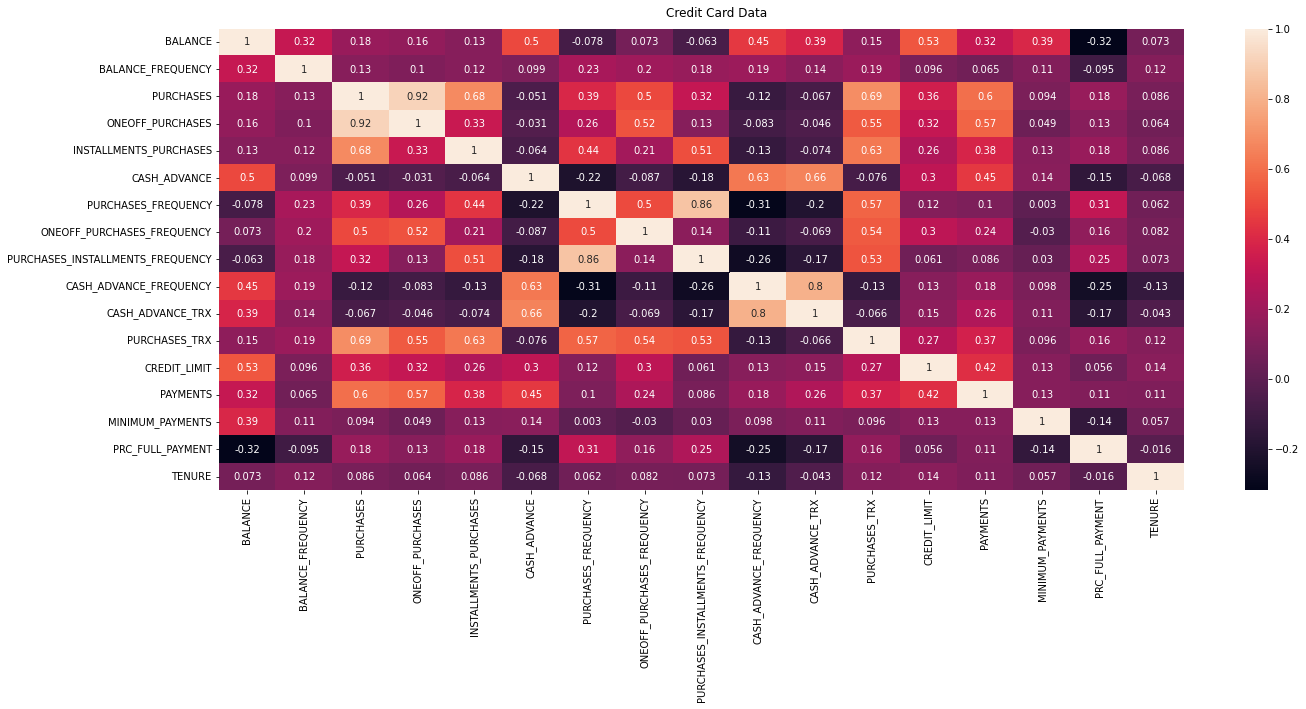

In [26]:
%matplotlib inline

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'
plt.figure(figsize = (20, 10)) 
sns.heatmap(creditcard_df.corr(), annot = True) 
plt.suptitle('Credit Card Data')
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=.95, wspace=None, hspace=None);

# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [27]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled.shape

(8950, 17)

In [28]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## Methods to select the optimal number of clusters (k)

Source: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

Let's review ways by which we can select an optimal number of clusters (K). These methods will help us to find the best value of K. We will discuss them one by one.

### 1. Elbow Curve Method
The elbow method runs k-means clustering on the dataset for a range of values of k (say 1 to 10).

- Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points.
- Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).

In the curve, we need to find the n value that make the line looks like an elbow. 

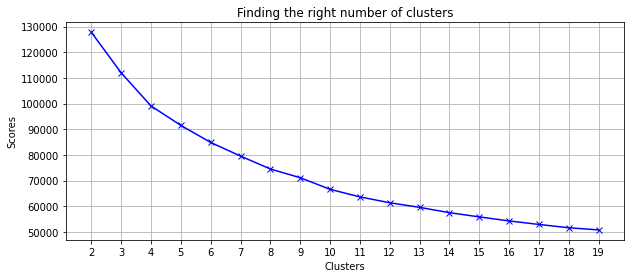

In [29]:
%matplotlib inline
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.
np.random.seed(101)

scores_1 = []
range_values = range(2, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.figure(figsize = (10, 4)) 
plt.plot(range_values, scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.xticks(range_values)
plt.grid()
plt.show()

### 2. Silhouette analysis
The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

- Select a range of values of k (say 1 to 10).
- Plot Silhouette coefﬁcient for each value of K.
- The equation for calculating the silhouette coefﬁcient for a particular data point:

$ s(i) = \frac{b(i) - a(i)}{max(a(i),b(i)} $

- S(i) is the silhouette coefficient of the data point i.
- a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
- b(i) is the average distance from i to all clusters to which i does not belong.

We will then calculate the average_silhouette for every k.

$ AvgSilhouette = mean\big(S(i)\big) $

Then plot the graph between AvgSilhouette and K.

Points to remember while calculating silhouette coefficient:
- The value of the silhouette coefﬁcient is between [-1, 1].
- A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
- The worst value is -1. Values near 0 denote overlapping clusters.
Let us see the python code.

We need to find teh value that the silhouette score is maximized.

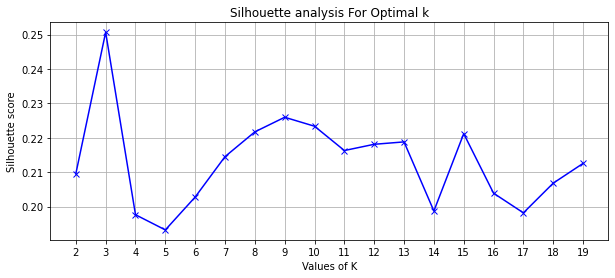

In [30]:
from sklearn.metrics import silhouette_score

scores_3 = []
range_values = range(2, 20)
for num_clusters in range_values:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(creditcard_df_scaled)
  cluster_labels = kmeans.labels_

  # silhouette score
  scores_3.append(silhouette_score(creditcard_df_scaled, cluster_labels))
  
plt.figure(figsize = (10, 4)) 
plt.plot(range_values, scores_3, 'bx-')
plt.xlabel('Values of K') 
plt.xticks(range_values)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.grid()
plt.show()

# TASK #6: APPLY K-MEANS METHOD

In [31]:
n_cluster = 8
kmeans = KMeans(n_cluster)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_
labels, len(labels)

(array([0, 5, 6, ..., 4, 4, 4], dtype=int32), 8950)

In [32]:
kmeans.cluster_centers_.shape

(8, 17)

In [33]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.0200,0.4039,-0.3619,-0.2470,-0.4018,-0.0863,-0.8680,-0.4113,-0.7587,0.1162,-0.0204,-0.4870,-0.3049,-0.2480,-0.0082,-0.4565,0.2717
1,-0.3648,0.3336,-0.0374,-0.2443,0.3603,-0.3636,0.9907,-0.3871,1.2061,-0.4752,-0.3612,0.1877,-0.2609,-0.2169,-0.0327,0.3138,0.2576
2,0.9018,0.4670,2.2710,1.7569,2.1419,-0.1955,1.1586,1.5839,1.2262,-0.3122,-0.2121,2.7815,1.2389,1.2903,0.4417,0.3048,0.3342
3,1.9231,0.3377,11.2120,10.6004,7.0331,0.4196,1.0470,1.9155,0.9813,-0.2589,0.0612,5.3624,3.0441,8.0990,1.1203,1.1101,0.3109
4,-0.3360,-0.3471,-0.2893,-0.2160,-0.2868,0.0683,-0.2031,-0.2887,-0.2245,0.3087,0.0010,-0.3881,-0.5672,-0.3927,-0.2091,0.0140,-3.2037
5,1.6996,0.3934,-0.2167,-0.1557,-0.2264,2.0268,-0.4728,-0.2116,-0.4103,1.9219,1.9427,-0.2647,1.0387,0.8281,0.5580,-0.3922,0.0710
6,-0.1646,0.3920,0.4537,0.5934,-0.0176,-0.3326,0.9430,1.8773,0.0894,-0.4064,-0.3223,0.5243,0.3754,0.0875,-0.1625,0.4055,0.2611
7,-0.7013,-2.1416,-0.3110,-0.2356,-0.3026,-0.3221,-0.5560,-0.4430,-0.4402,-0.5211,-0.3763,-0.4196,-0.1780,-0.2024,-0.2568,0.2804,0.1995


In [34]:
# In order to understand what these numbers mean, let's perform inverse transformation

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,"1,606.1713",0.9730,229.9502,182.3896,47.7425,797.8091,0.1420,0.0797,0.0629,0.1584,3.1098,2.6051,"3,385.2559","1,015.1235",845.1460,0.0202,11.8810
1,805.2201,0.9563,923.3388,186.8853,736.8966,216.4082,0.8880,0.0870,0.8438,0.0400,0.7842,19.3745,"3,545.0993","1,105.2809",788.0949,0.2455,11.8621
2,"3,441.5310",0.9879,"5,855.1516","3,508.5911","2,347.9789",568.8741,0.9554,0.6750,0.8518,0.0727,1.8014,83.8463,"9,002.2459","5,468.4216","1,893.4649",0.2429,11.9645
3,"5,567.1422",0.9573,"24,957.9050","18,186.8757","6,771.0293","1,858.8446",0.9106,0.7739,0.7544,0.0833,3.6667,148.0000,"15,570.0000","25,178.8827","3,475.0595",0.4784,11.9333
4,865.0160,0.7951,385.1817,233.9780,151.6861,"1,122.0649",0.4088,0.1163,0.2752,0.1969,3.2556,5.0627,"2,430.8914",596.3738,376.8029,0.1578,7.2299
5,"5,102.1228",0.9705,540.2898,334.0440,206.3642,"5,229.1572",0.3006,0.1393,0.2014,0.5197,16.5064,8.1292,"8,273.5210","4,130.2845","2,164.7094",0.0390,11.6123
6,"1,221.9154",0.9701,"1,972.5068","1,577.3347",395.1721,281.2974,0.8688,0.7625,0.4000,0.0538,1.0493,27.7418,"5,860.1982","1,986.3274",485.5263,0.2723,11.8668
7,104.8758,0.3700,338.6480,201.4485,137.4505,303.3077,0.2672,0.0703,0.1895,0.0309,0.6810,4.2800,"3,846.8185","1,147.0748",265.8044,0.2357,11.7843


In [35]:
labels.shape # Labels associated to each data point

(8950,)

In [36]:
labels.max(), labels.min()

(7, 0)

In [37]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans, len(y_kmeans)

(array([1, 6, 7, ..., 5, 5, 5], dtype=int32), 8950)

In [38]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = creditcard_df.copy(deep=True)
creditcard_df_cluster['cluster'] = labels
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.9007,0.8182,95.4000,0.0000,95.4000,0.0000,0.1667,0.0000,0.0833,0.0000,0,2,"1,000.0000",201.8021,139.5098,0.0000,12,0
1,"3,202.4674",0.9091,0.0000,0.0000,0.0000,"6,442.9455",0.0000,0.0000,0.0000,0.2500,4,0,"7,000.0000","4,103.0326","1,072.3402",0.2222,12,5
2,"2,495.1489",1.0000,773.1700,773.1700,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0,12,"7,500.0000",622.0667,627.2848,0.0000,12,6
3,"1,666.6705",0.6364,"1,499.0000","1,499.0000",0.0000,205.7880,0.0833,0.0833,0.0000,0.0833,1,1,"7,500.0000",0.0000,864.2065,0.0000,12,0
4,817.7143,1.0000,16.0000,16.0000,0.0000,0.0000,0.0833,0.0833,0.0000,0.0000,0,1,"1,200.0000",678.3348,244.7912,0.0000,12,0


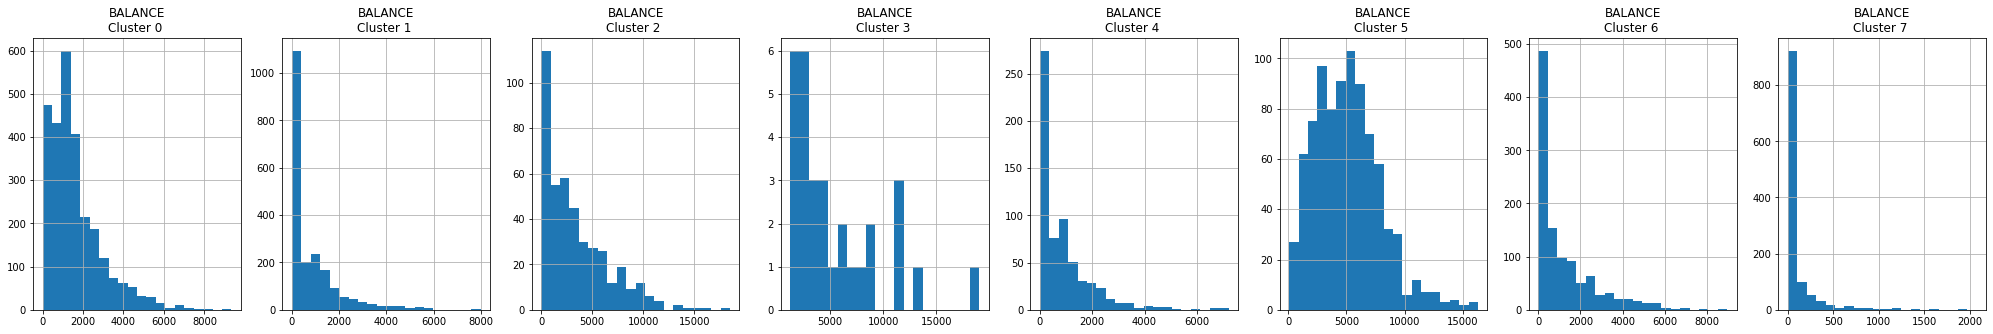

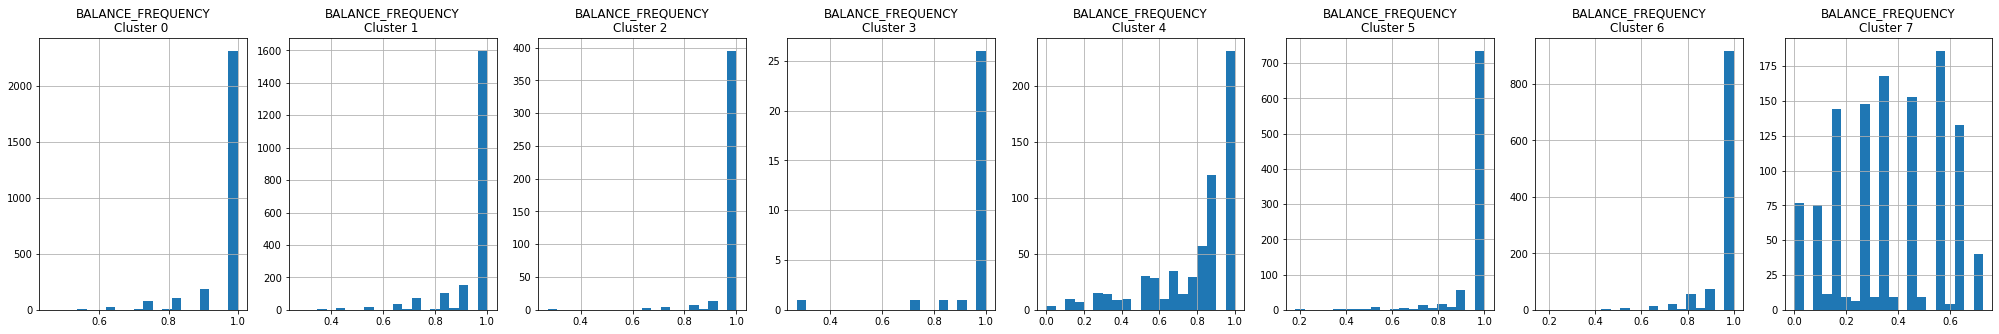

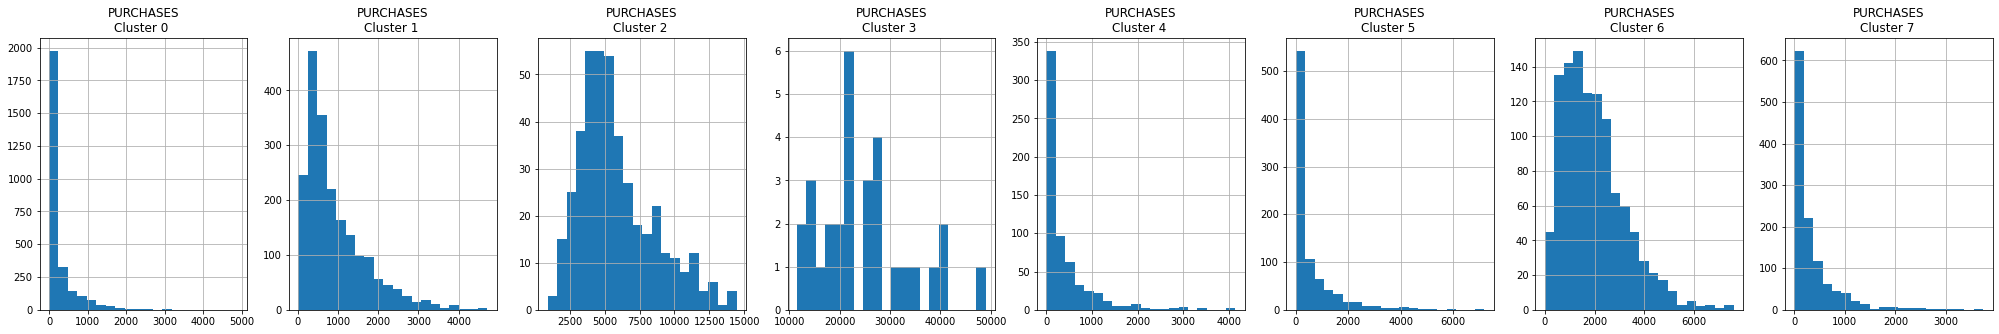

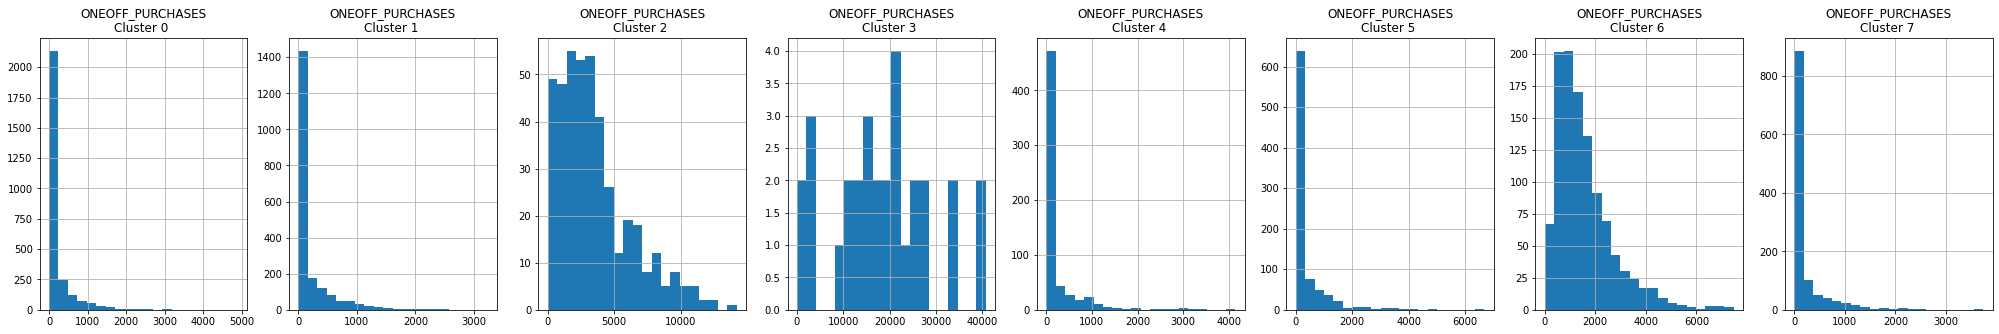

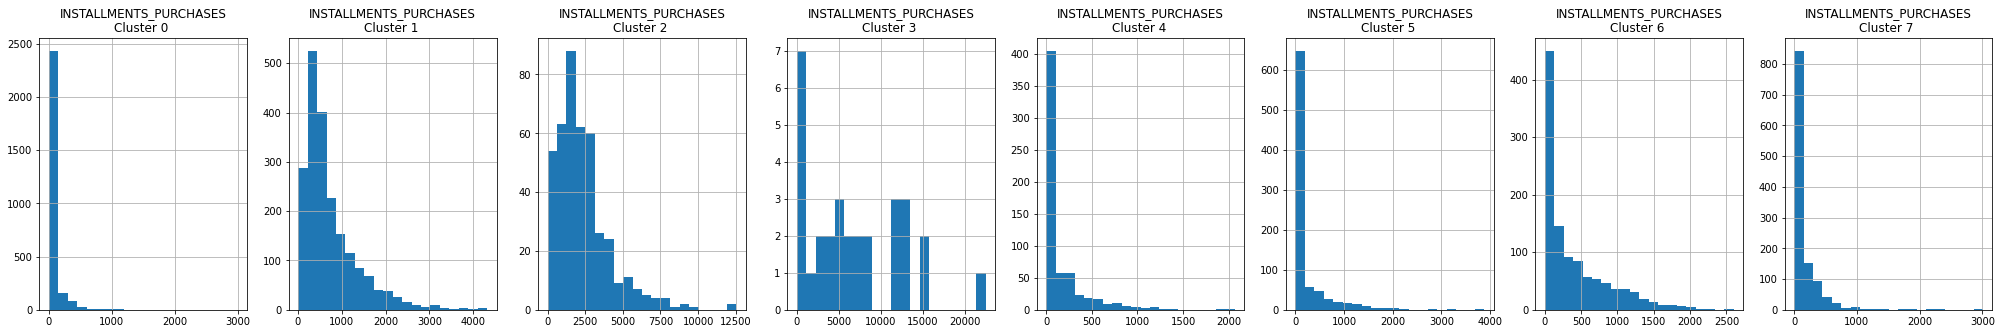

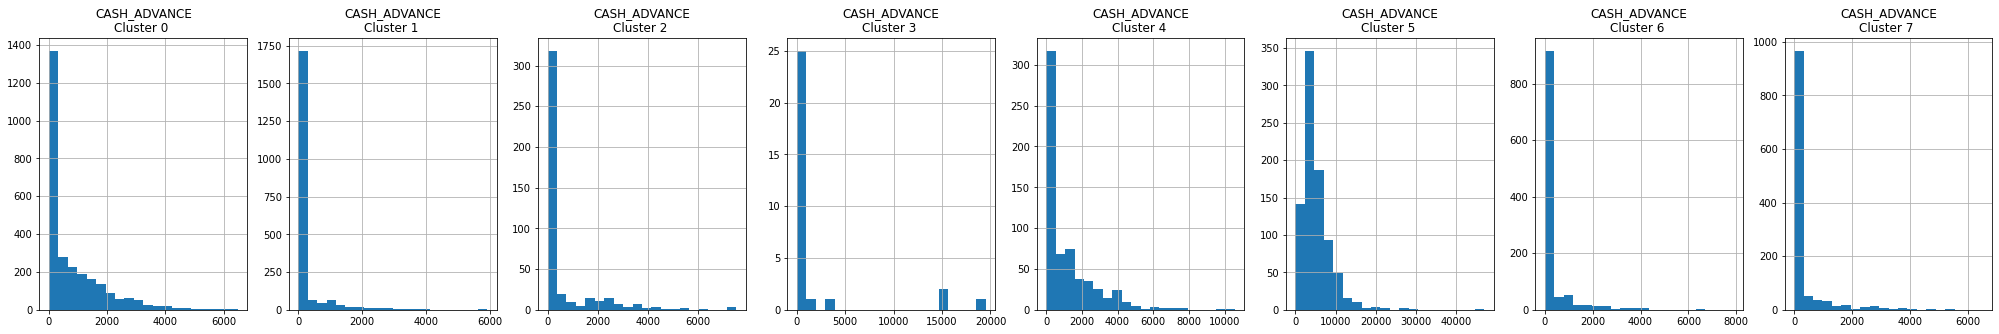

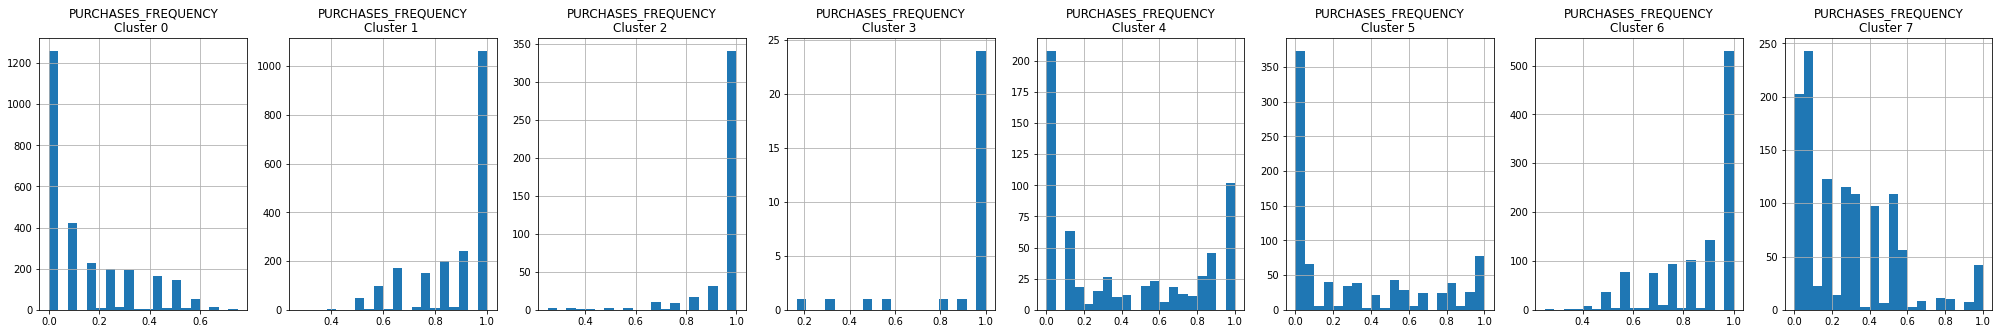

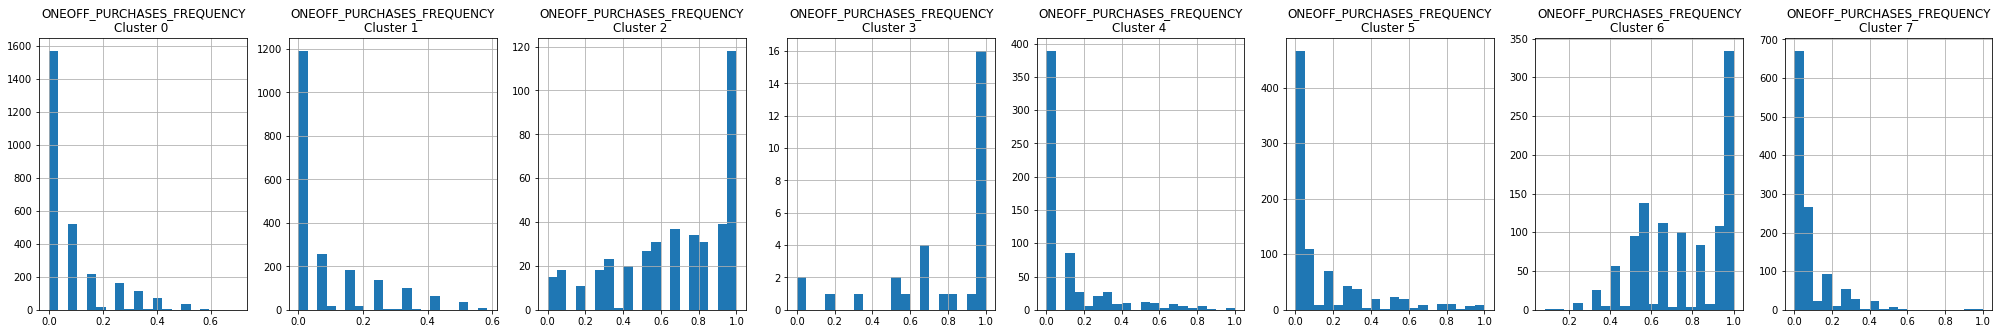

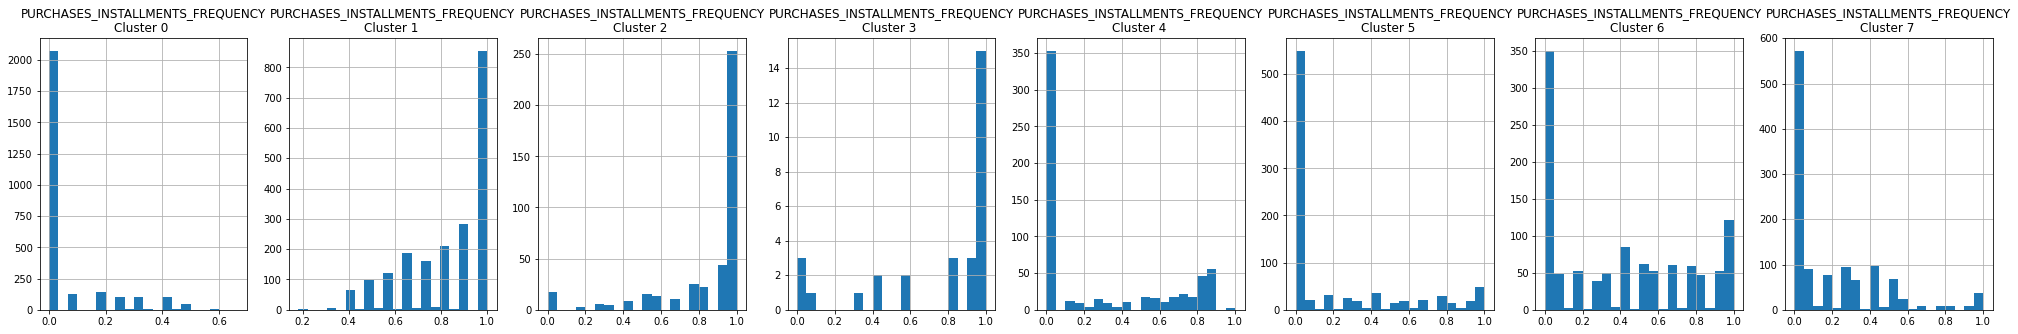

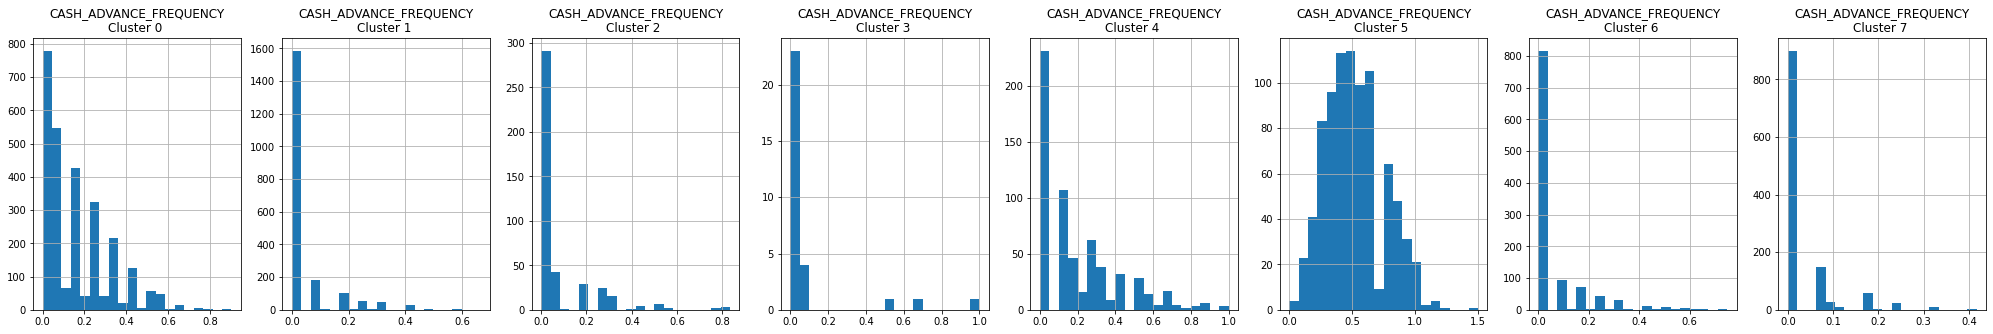

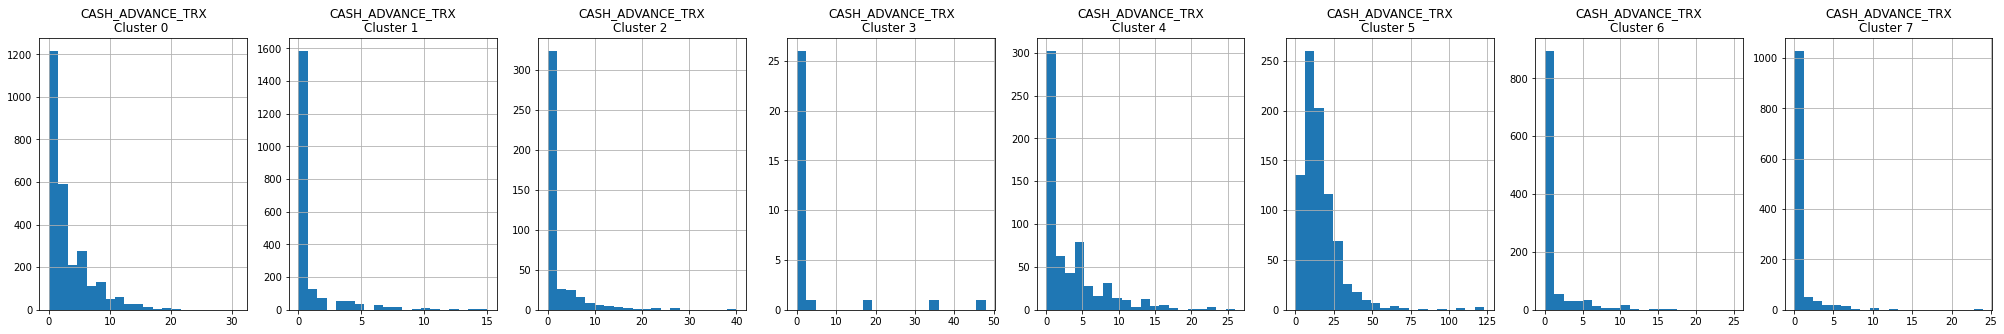

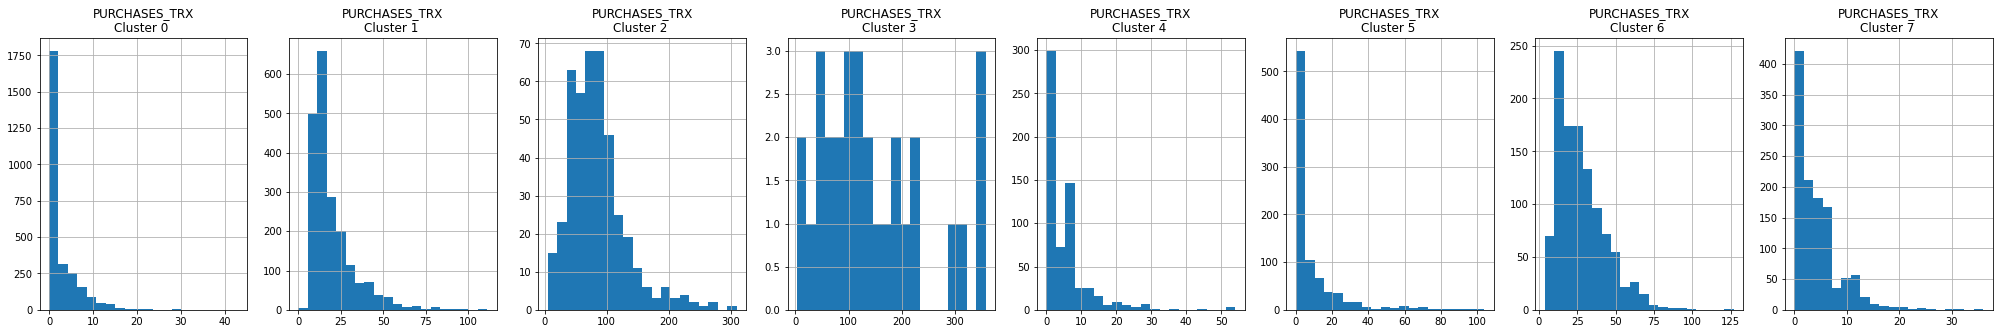

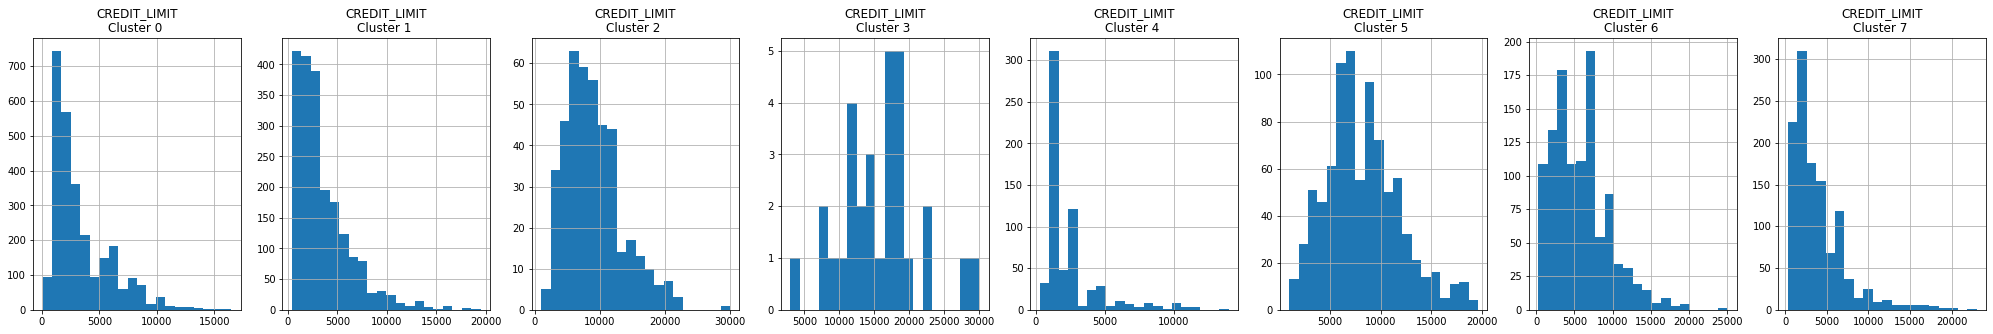

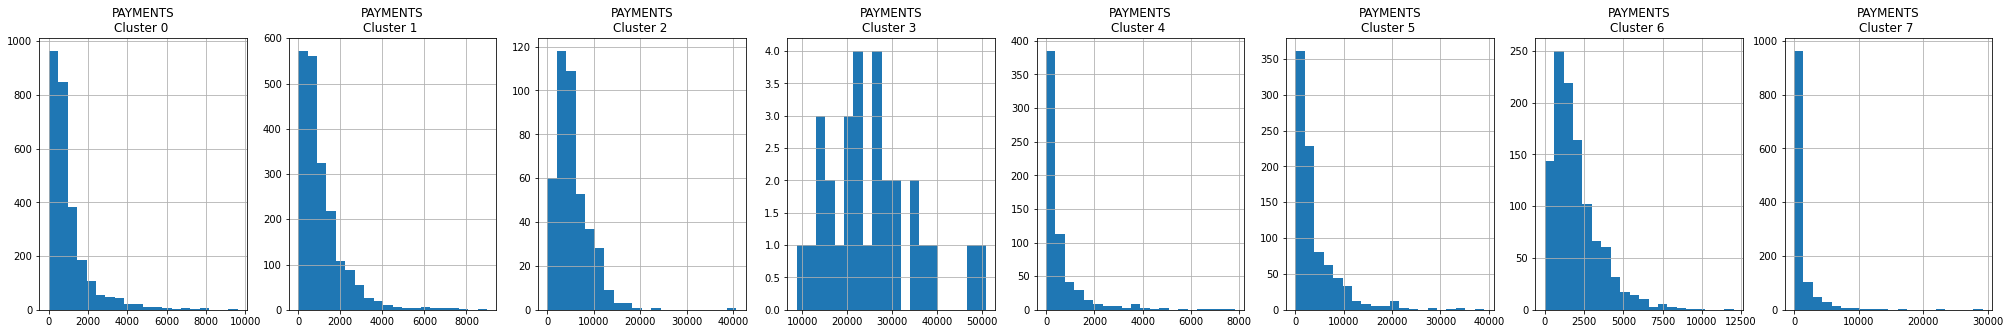

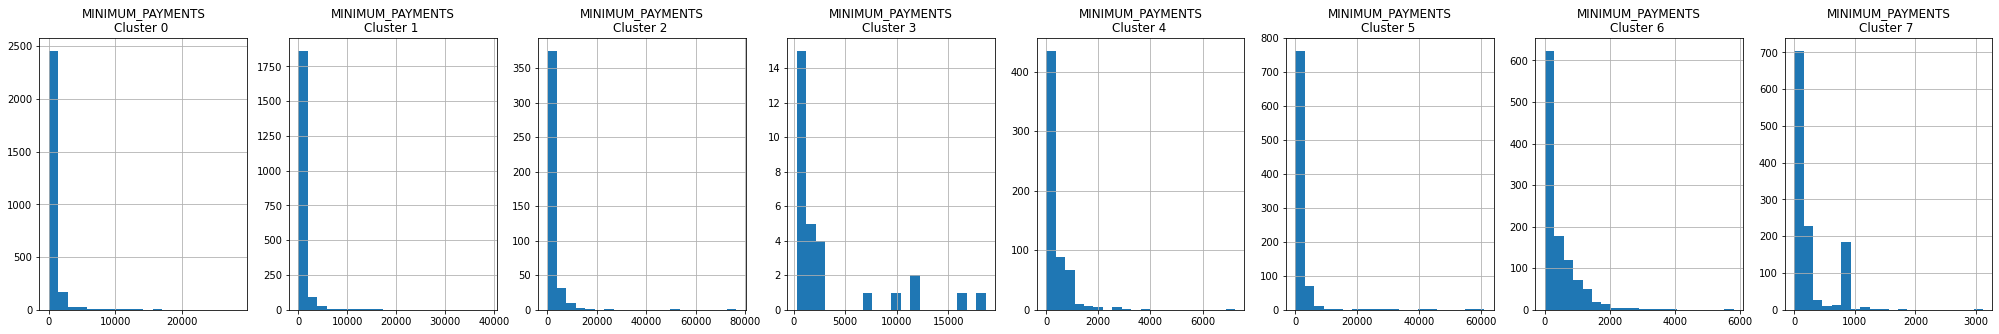

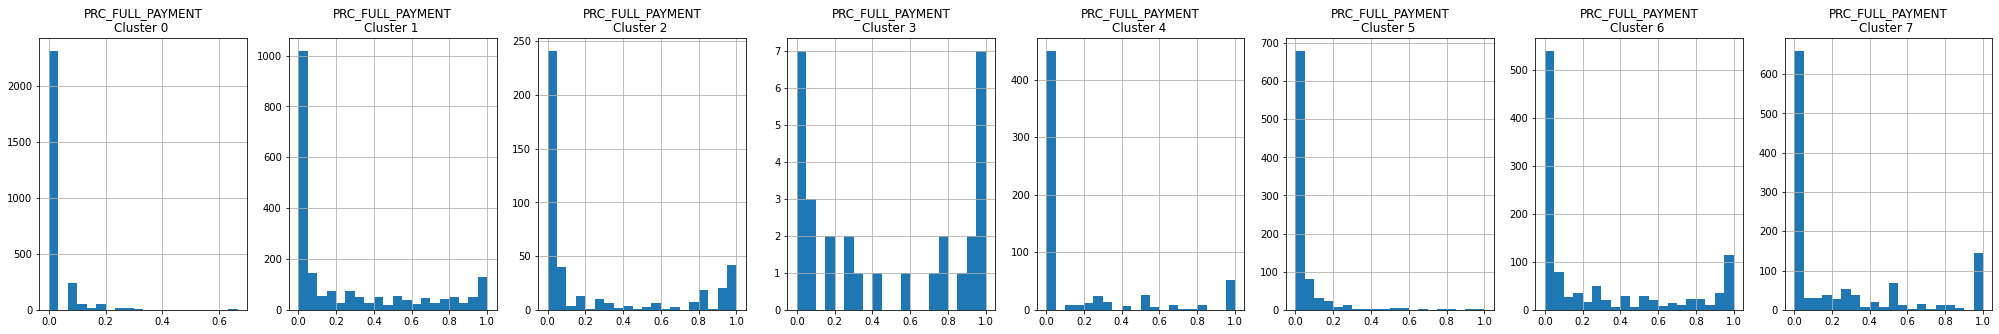

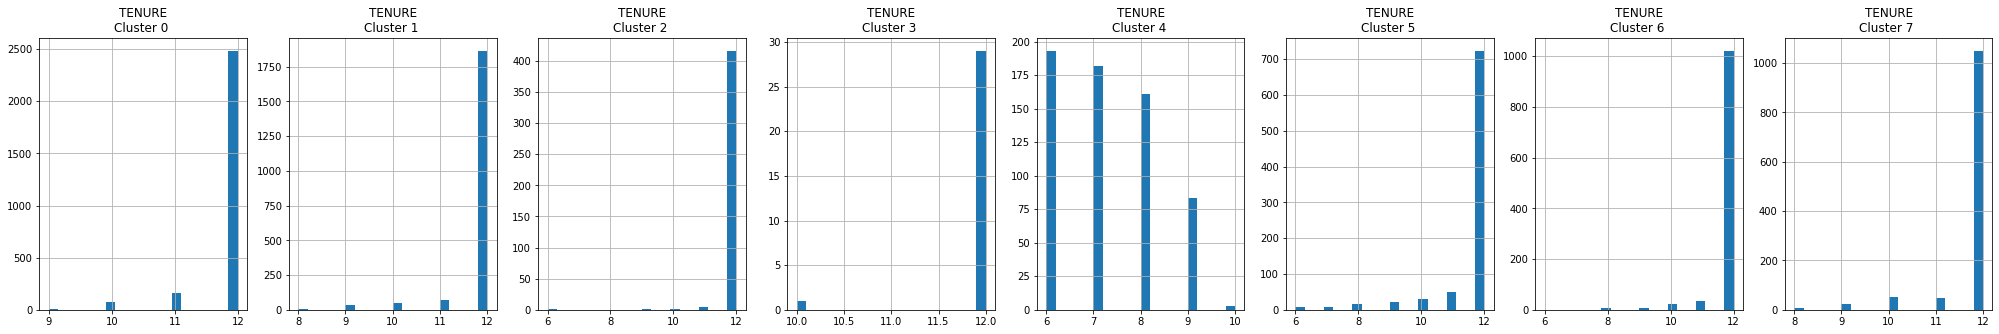

In [39]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}\nCluster {} '.format(i,j))
  
  plt.show()

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [40]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221951, -1.07645293],
       [-1.13829175,  2.50646617],
       [ 0.96967854, -0.38350979],
       ...,
       [-0.92620351, -1.81078408],
       [-2.33655202, -0.65796303],
       [-0.5564258 , -0.40045825]])

In [41]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.6822,-1.0765
1,-1.1383,2.5065
2,0.9697,-0.3835
3,-0.8736,0.0432
4,-1.5994,-0.6886


In [42]:
# Concatenate the clusters labels to the dataframe
pca_df['cluster'] = labels
pca_df.head()

,pca1,pca2,cluster
0,-1.6822,-1.0765,0
1,-1.1383,2.5065,5
2,0.9697,-0.3835,6
3,-0.8736,0.0432,0
4,-1.5994,-0.6886,0


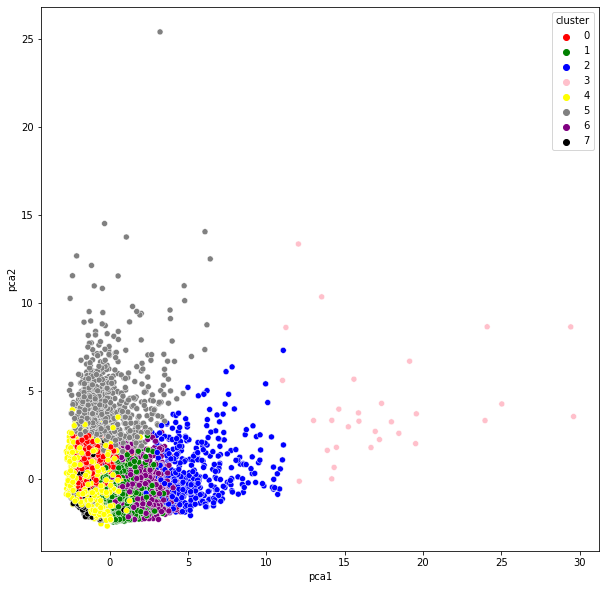

In [43]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, 
                     palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [44]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7
input_df = Input(shape=(17,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
creditcard_df_scaled.shape

(8950, 17)

In [46]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 5s 60ms/step - loss: 0.5943
Epoch 2/25
70/70 [==============================] - 4s 61ms/step - loss: 0.3590
Epoch 3/25
70/70 [==============================] - 4s 61ms/step - loss: 0.2635
Epoch 4/25
70/70 [==============================] - 4s 59ms/step - loss: 0.2116
Epoch 5/25
70/70 [==============================] - 5s 73ms/step - loss: 0.1896
Epoch 6/25
70/70 [==============================] - 5s 64ms/step - loss: 0.1704
Epoch 7/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1475
Epoch 8/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1355
Epoch 9/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1276
Epoch 10/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1199
Epoch 11/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1105
Epoch 12/25
70/70 [==============================] - 4s 59ms/step - loss: 0.1127
Epoch 13/25
70/70 [==================

In [47]:
autoencoder.save_weights('autoencoder.h5')

In [48]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 6ms/step


In [49]:
pred.shape

(8950, 10)

In [50]:
pred

array([[0.        , 0.        , 0.        , ..., 1.809478  , 0.        ,
        1.4472784 ],
       [0.        , 0.        , 0.        , ..., 2.5389059 , 0.        ,
        2.4895723 ],
       [0.        , 0.        , 0.        , ..., 3.0096095 , 0.        ,
        0.58126724],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5050732 , 0.        ,
        0.65294695],
       [0.        , 0.        , 0.        , ..., 0.808233  , 0.        ,
        2.0267766 ],
       [0.        , 0.        , 0.        , ..., 0.5222879 , 0.        ,
        1.5506285 ]], dtype=float32)

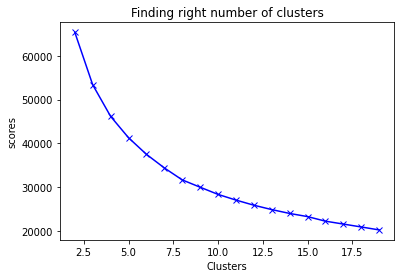

In [51]:
scores_2 = []

range_values = range(2, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(range_values, scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

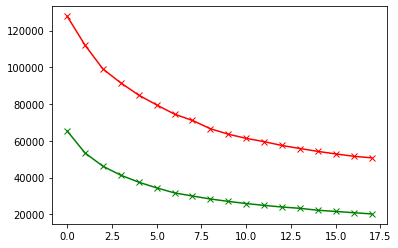

In [52]:
%matplotlib inline 

plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g');

In [53]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [54]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.9007,0.8182,95.4000,0.0000,95.4000,0.0000,0.1667,0.0000,0.0833,0.0000,0,2,"1,000.0000",201.8021,139.5098,0.0000,12,1
1,"3,202.4674",0.9091,0.0000,0.0000,0.0000,"6,442.9455",0.0000,0.0000,0.0000,0.2500,4,0,"7,000.0000","4,103.0326","1,072.3402",0.2222,12,2
2,"2,495.1489",1.0000,773.1700,773.1700,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0,12,"7,500.0000",622.0667,627.2848,0.0000,12,1
3,"1,666.6705",0.6364,"1,499.0000","1,499.0000",0.0000,205.7880,0.0833,0.0833,0.0000,0.0833,1,1,"7,500.0000",0.0000,864.2065,0.0000,12,2
4,817.7143,1.0000,16.0000,16.0000,0.0000,0.0000,0.0833,0.0833,0.0000,0.0000,0,1,"1,200.0000",678.3348,244.7912,0.0000,12,1


In [55]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.0967,0.3898
1,1.3555,2.1827
2,0.5697,-0.8030
3,0.8226,1.0280
4,-1.4624,0.1500


In [56]:
pca_df['cluster'] = labels
pca_df.head()

,pca1,pca2,cluster
0,-1.0967,0.3898,1
1,1.3555,2.1827,2
2,0.5697,-0.8030,1
3,0.8226,1.0280,2
4,-1.4624,0.1500,1


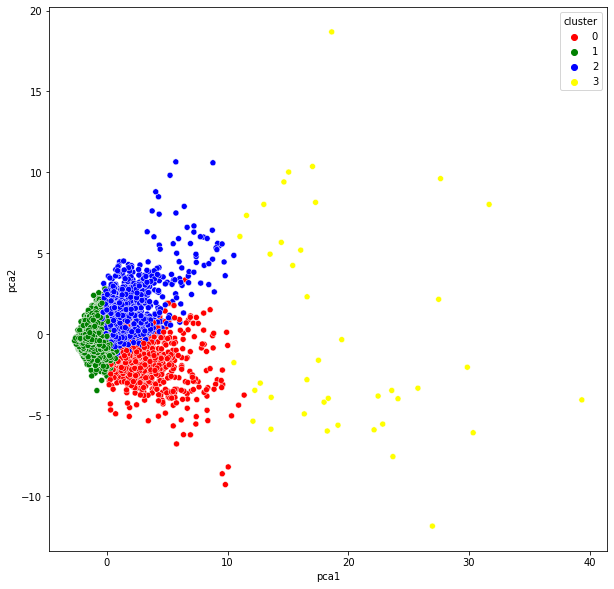

In [57]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

In [58]:
# Trying with k=3
kmeans = KMeans(3)
kmeans.fit(creditcard_df)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

df_cluster = creditcard_df.copy(deep=True)
df_cluster['cluster'] = labels

pca = PCA(n_components=2)
prin_comp = pca.fit_transform(creditcard_df)
pca_df = pd.DataFrame(data=prin_comp, columns=['pca1','pca2'])
pca_df['cluster'] = labels
pca_df.head()

,pca1,pca2,cluster
0,"-4,326.3840",921.5669,1
1,"4,118.9167","-2,432.8463",2
2,"1,497.9077","-1,997.5787",2
3,"1,394.5486","-1,488.7435",2
4,"-3,743.3519",757.3427,1


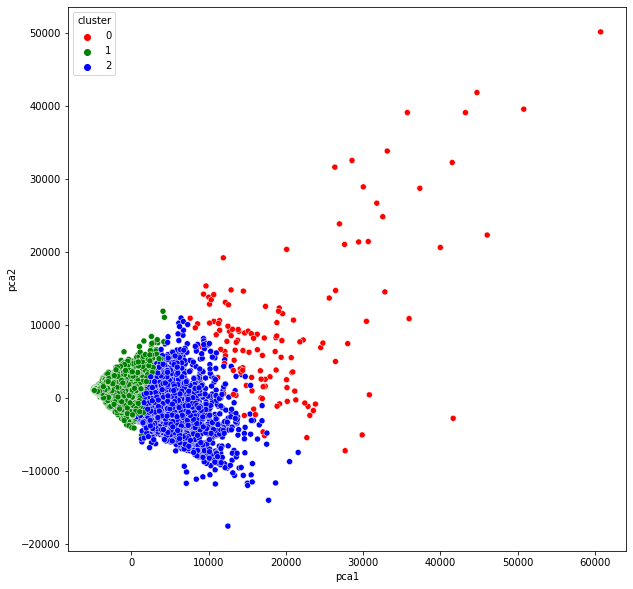

In [59]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette =['red','green','blue'])
plt.show()